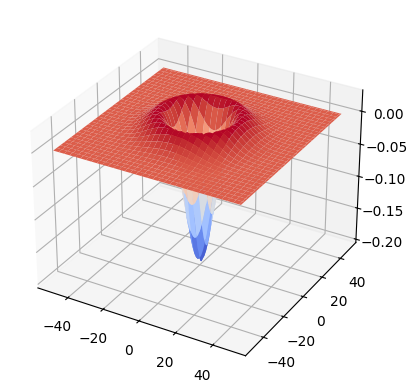

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv



sigma = 10
hw = 50
x = np.linspace(-hw,hw,2*hw+1)
y = np.linspace(-hw,hw,2*hw+1)

X,Y = np.meshgrid(x,y)

G = 1/(2*np.pi) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

#partial derivatives
Gx = cv.Sobel(G,cv.CV_64F,1,0)
Gy = cv.Sobel(G,cv.CV_64F,0,1)

Gxx = cv.Sobel(Gx,cv.CV_64F,1,0)
Gyy = cv.Sobel(Gy,cv.CV_64F,0,1)

# Gxy = cv.Sobel(Gx,cv.CV_64F,0,1)

L = Gxx + Gyy

# plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,L,cmap='coolwarm')
plt.show()


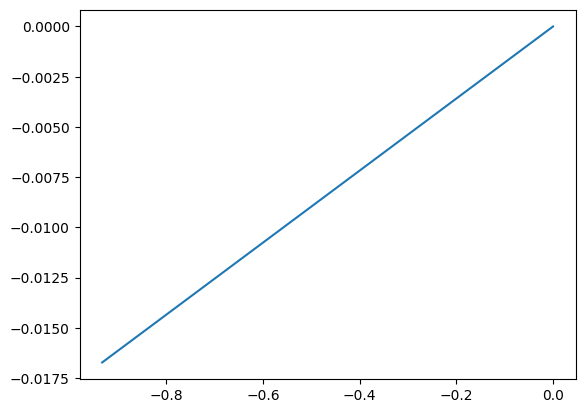

In [5]:
A = np.array( [x-np.mean(x),y-np.mean(y)] )
U,S,V = np.linalg.svd(A)

# eigenvector associated with the smallest eigenvalue
v = V[1,:]
a = V[0,0]
b = V[1]

# plot the eigenvector
plt.figure()
plt.plot([0,v[0]],[0,v[1]])
plt.show()
 

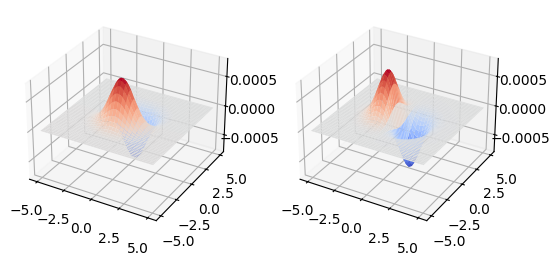

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

delta = 0.1
xx, yy = np.meshgrid(np.arange(-5, 5 + delta, delta), np.arange(-5, 5, delta))

sigma = 1
g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
g /= np.sum(g)

# sobel filter vertical and horizontal
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

# convolution
g_v = cv.filter2D(g,-1,sobel_v)
g_h = cv.filter2D(g,-1,sobel_h)

# plot
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
surf1 = ax1.plot_surface(xx,yy,g_v,cmap='coolwarm')
surf2 = ax2.plot_surface(xx,yy,g_h,cmap='coolwarm')
plt.show()

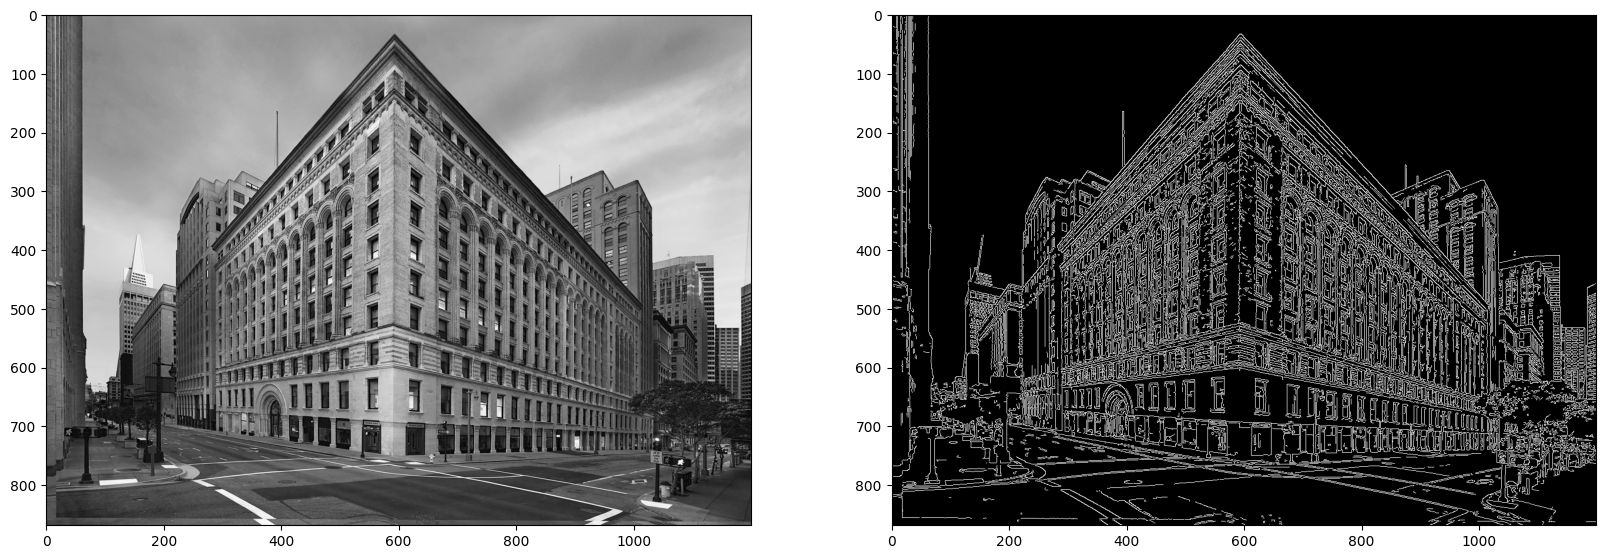

In [24]:
# canny edge detecter
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/building.jpg',0)
edges = cv.Canny(img,120,200) # 100 and 200 are the thresholds lower and higher

# plot the image

fig,ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(edges, cmap='gray')
plt.show()



In [18]:
# Meaning of low-threshold and high-threshold
import cv2 as cv
import numpy as np
import math
hi_threshold_max = 255
title_window = r'Canny'

ratio = 0.3 # Low threshold/Hi threshold
hi_threshold = 255
low_threshold = math.floor(hi_threshold*ratio)

def on_trackbar(val):
    hi_threshold = cv.getTrackbarPos(trackbar1_name, title_window)
    ratio = cv.getTrackbarPos(trackbar2_name, title_window)/100.
    low_threshold = hi_threshold*ratio
    edges = cv.Canny(im,low_threshold,hi_threshold)
    cv.imshow(title_window, edges)

im = cv.imread('images/girl.jpg', cv.IMREAD_COLOR)
if im is None:
    print('Could not open or find the image: ')
    exit(0)

cv.namedWindow(title_window)
trackbar1_name = r'High Threshold Value'
cv.createTrackbar(trackbar1_name, title_window , hi_threshold, hi_threshold_max, on_trackbar)
trackbar2_name = r'Low Threshold %'
cv.createTrackbar(trackbar2_name, title_window , 1, 100, on_trackbar)
on_trackbar(hi_threshold)
cv.waitKey()
cv.destroyAllWindows()

NameError: name 'trackbar2_name' is not defined

268865600.0


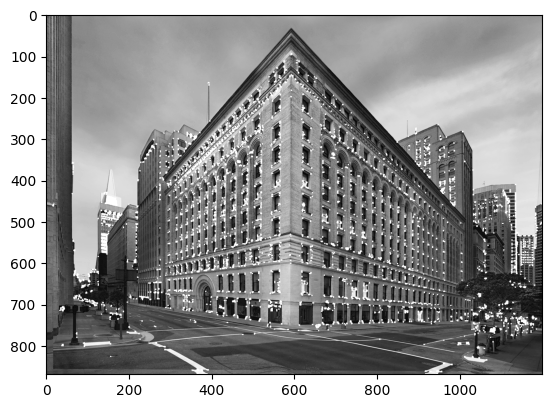

In [42]:
# Harris corner detector

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/building.jpg',0)
img = np.float32(img)
# convert to float32 beacusse Harris corner detector requires float32 beacuse it uses derivatives

# Harris corner detector
dst = cv.cornerHarris(img,2,3,0.04) # 2 is the size of the neighbourhood, 3 is the size of the Sobel kernel

# dilate the corner points
dst = cv.dilate(dst,None) 
# None is the kernel used for dilation. dilation means that the white points will be expanded

print(dst.max())

# threshold
img[dst>0.01*dst.max()] = 255 # 0.01 is the threshold because dst is normalized between 0 and 1

# plot
plt.imshow(img, cmap='gray')
plt.show()


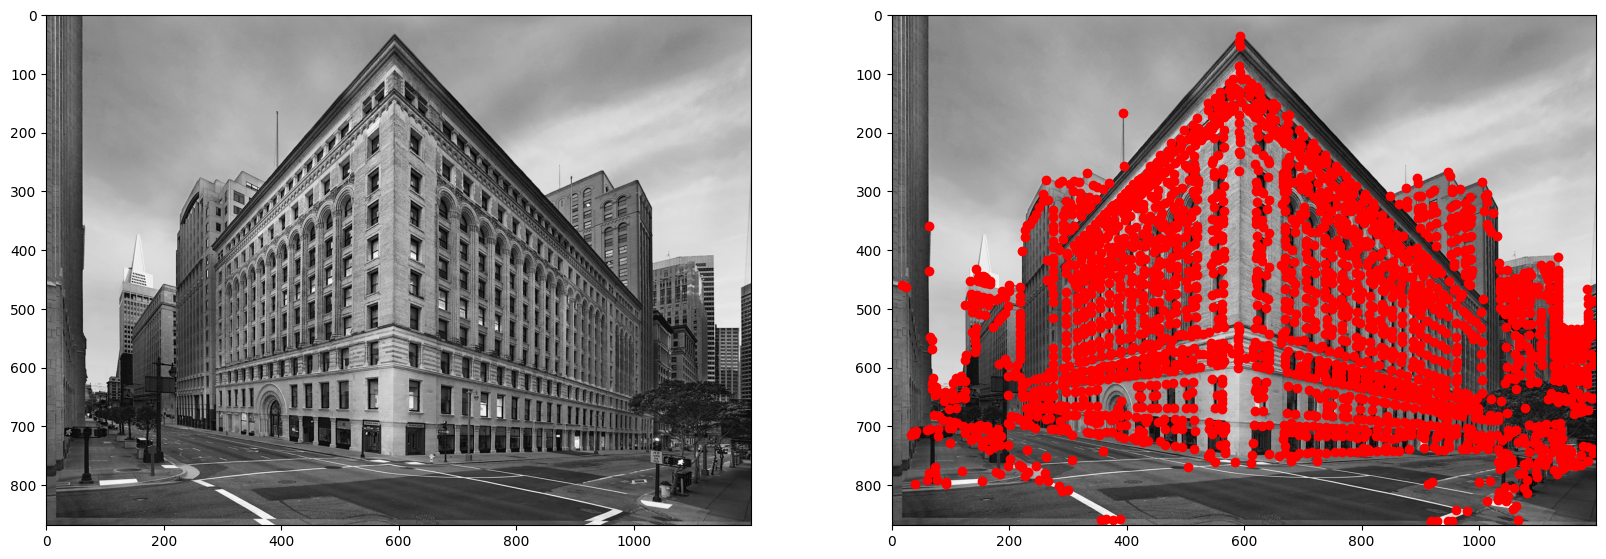

In [40]:
# hariis corner detector with custom

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

i = cv.imread('images/building.jpg',0)
i = np.float32(i)

# sobel filter
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)

# compute the gradient
Ix = cv.filter2D(i,-1,sobel_h)
Iy = cv.filter2D(i,-1,sobel_v)

# use gaussian filter to compute the matrix M beacuse the corner is the local maxima
sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix**2,(ksize,ksize),sigma)
m12 = cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m22 = cv.GaussianBlur(Iy**2,(ksize,ksize),sigma)
m21 = m12

# determinant and trace
det = m11*m22 - m12**2
trace = m11 + m22  # trace is the sum of the diagonal elements
alpha = 0.04
R = det - alpha*trace**2

# threshold
R[R<1e8] = 0
coordinates = peak_local_max(R, min_distance=2) 
# find the local maxima beacuse the corner is the local maxima


# plot two images in two columns and corners in red color

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(i, cmap='gray')
ax[1].imshow(i, cmap='gray')
ax[1].plot(coordinates[:,1],coordinates[:,0],'ro') # plot the corners in red color
plt.show()